# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
import random
random.seed(2)

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio

from see import JupyterGUI

Dropdown(description='Choose image:', index=5, options=(WindowsPath('Image_data/Examples/a_walk_in_the_park.jp…

import imageio
img = imageio.imread('Image_data\Examples\CuteDog.jpg')
gmask = imageio.imread('Image_data\Examples\CuteDog_GT.png')


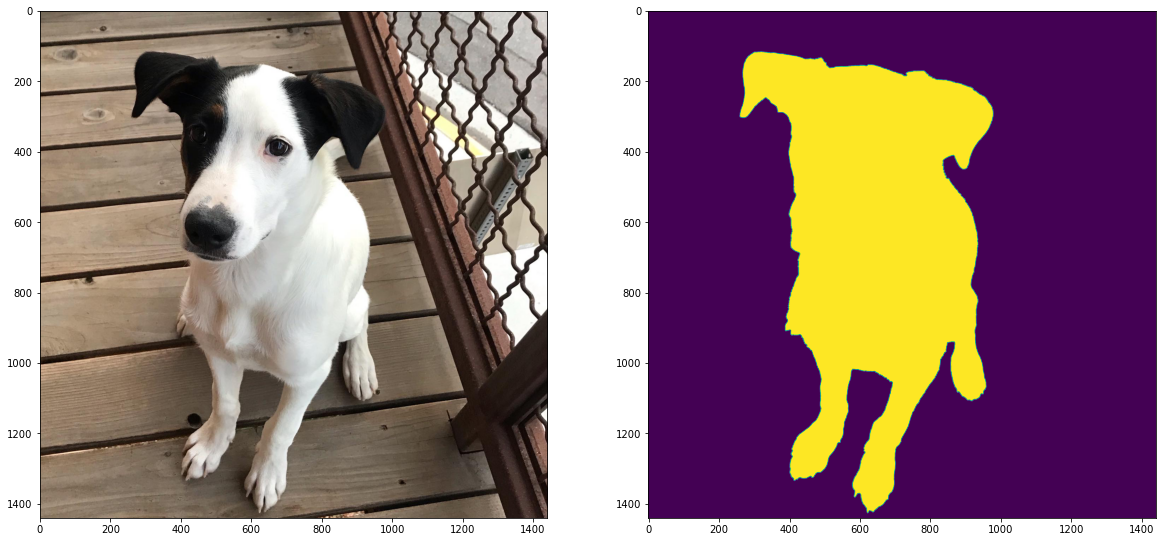

In [3]:
data = JupyterGUI.pickimage()

# Create Workflow

In [ ]:
from see import base_classes 

In [ ]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness

workflow.addalgos([colorspace, segmentor, segment_fitness])
wf = workflow()
print(wf)

In [ ]:
from see.base_classes import pipedata
individual = segmentor()
d = pipedata()
d.img = data.img
d.gmask = data.gmask
individual.runAlgo(d)

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [ ]:
from see import GeneticSearch

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [ ]:
mydata = base_classes.pipedata()
mydata.img = data.img
mydata.gmask = data.gmask

In [ ]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [ ]:
# warnings may appear when this runs
population = my_evolver.run(ngen=2)

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [ ]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

We can see the mask this individual generates by evaluating it, then plotting the result:

In [ ]:
seg = workflow(params)
data = seg.pipe(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.inputimage)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [ ]:
print('Fitness Value: ', segment_fitness().evaluate(data.mask, data.gmask)[0])

If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
dir(base_classes)

In [ ]:
ex = base_classes.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.